## About the dataset
The Credit Card Fraud Detection dataset, sourced from a research collaboration, contains transactions made by European cardholders in September 2013. This dataset includes 284,807 transactions, among which 492 are fraudulent, representing only 0.172% of the transactions. The dataset is highly imbalanced, which is typical for fraud detection scenarios.

The dataset contains numerical features resulting from a Principal Component Analysis (PCA) transformation. This means the original data has been transformed into a set of principal components, making it difficult to interpret the features directly. The dataset includes:

Time: The seconds elapsed between this transaction and the first transaction in the dataset.
V1 to V28: The principal components obtained with PCA. These are anonymized features.
Amount: The transaction amount, which can be used for example-dependent cost-sensitive learning.
Class: The response variable, where 1 indicates fraud and 0 indicates a non-fraudulent transaction.
This dataset is widely used to benchmark fraud detection algorithms due to its challenging nature and high level of anonymization and privacy.

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
#(Original file type is 'csv', converted to parquet to reduce file size)
# Load the dataset
df = pd.read_parquet('dataset/creditcard.parquet')

In [23]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

print(f"Data Shape: {df.shape}")
df.head()

Data Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Checking Duplicates and Null Values
Checking for duplicates and null values before EDA ensures data integrity and helps identify issues that might affect the analysis. Identifying and addressing these issues early prevents skewed insights and misleading conclusions during the exploratory analysis.

For duplicates, remove them as needed. For null values, assess their extent and impact, but handle removal after splitting into train and test sets.

In [4]:
#checking null value
has_null = df.isnull().values.any()

if has_null:
    print('Data has null values. See count:')
    print(df.isnull().sum())  #to get the total count of null values per column
else:
    print('Data has no null values.')

#checking duplicate values
has_duplicates = df.duplicated().any()
if has_duplicates:
    print(f"Has {df.duplicated().sum()} duplicates.")
    data = df.drop_duplicates()
    print(f"Duplicates removed.")
else:
    print('No duplicates found.')

Data has no null values.
Has 1081 duplicates.
Duplicates removed.


### Removing the `Time` Column

The `Time` column in the credit card fraud detection dataset typically represents the time elapsed between transactions. It is generally removed for the following reasons:

- **Predictive Value**: It usually does not provide significant predictive value for identifying fraudulent transactions.
- **Noise Reduction**: Removing it helps to simplify the model and reduce potential noise or overfitting.
- **Data Complexity**: It adds unnecessary complexity without improving model performance.

**Note**: While the `Time` column could be useful in temporal models that consider the sequence or timing of transactions, this dataset is not typically suited for such models. The dataset is generally used with models that do not focus on temporal aspects.

In [5]:
# drop time column
df.drop(['Time'], axis=1, inplace=True)

print(f"New data shape: {df.shape}")

New data shape: (284807, 30)


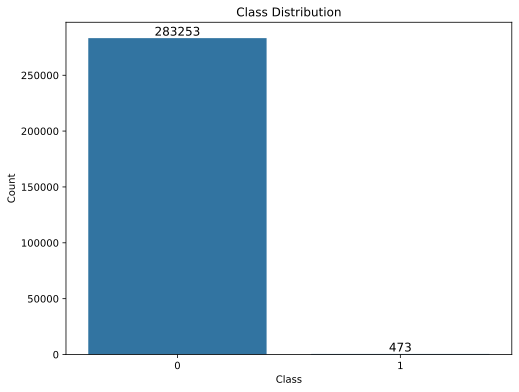

In [28]:
#check data distribution
class_counts = data['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Plot the value counts using Seaborn
plt.figure(figsize=(8, 6))
bars = sns.barplot(x='Class', y='Count', data=class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotating bars with counts
for index, row in class_counts.iterrows():
    bars.text(index, row['Count'], format(row['Count'], '.0f'),
            ha='center', va='bottom', size=12)

plt.show()

In [6]:
# Split data into features and target
X = df.drop('Class', axis = 1)
y = df['Class']

### Balancing class imbalance using SMOTE
Undersampling makes no sense because reducing 284315 to just 492, we are going to loose a lot of data and the result will not be accurate.

In [7]:
#Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)

In [8]:
# Feature scaling
scaler =  StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [9]:
X_train_resampled, y_train_resampled = SMOTE(random_state=4671).fit_resample(X_train, y_train)
y_train_resampled.value_counts()

,count
Class,
0,227451
1,227451


## Model Selection

Random Forest and Gradient Boosting are selected due to their effectiveness in addressing the dataset's unique characteristics, such as high-dimensional sparse features, extreme class imbalance.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


--------- Logistic_Regression ----------
Accuracy: 0.9731399880622169
Precision: 0.05583126550868486
Recall: 0.9183673469387755
F1 Score: 0.10526315789473685

# Detailed Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



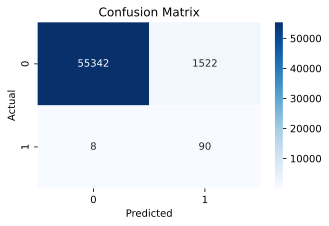




--------- Random_Forest ----------
Accuracy: 0.9994382219725431
Precision: 0.851063829787234
Recall: 0.8163265306122449
F1 Score: 0.8333333333333334

# Detailed Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



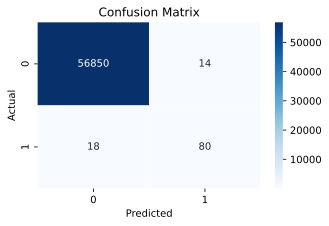




--------- LightGBM ----------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Accuracy: 0.9953828868368386
Precision: 0.2594752186588921
Recall: 0.9081632653061225
F1 Score: 0.4036281179138322

# Detailed Classification Report
    

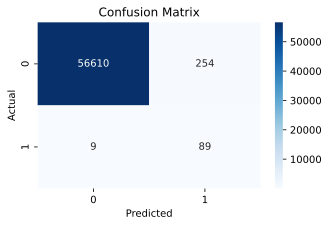




--------- XGBoost ----------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:18:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9991573329588147
Precision: 0.7049180327868853
Recall: 0.8775510204081632
F1 Score: 0.7818181818181819

# Detailed Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.88      0.78        98

    accuracy                           1.00     56962
   macro avg       0.85      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962



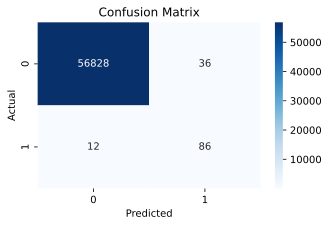

In [34]:
# Model initialization
classifier = {
    'Logistic_Regression' : LogisticRegression(max_iter=100000),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMClassifier(objective='binary', metric='binary_logloss', num_leaves=31, learning_rate=0.05, feature_fraction=0.9),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for model_name, clf in classifier.items():

    #performance metrics
    print(f"--------- {model_name} ----------")
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)

    # Calculate the metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}", end='\n\n')

    # detailed classification report
    print('# Detailed Classification Report')
    print(classification_report(y_test, y_pred))

    #confusion matrix
    plt.figure(1, figsize=(5, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'Confusion_Matrix_{model_name}.png', bbox_inches='tight')
    plt.show()

    print('', end='\n\n\n')

## Experimenting Anomaly Detection Model
Anomaly detection models are used because the dataset is highly imbalanced, with fraudulent transactions being rare compared to normal transactions.

In [35]:
# Importing libraries
from sklearn.ensemble import IsolationForest

In [36]:
#Define Models and Parameters
models = {
    'IsolationForest': IsolationForest(n_estimators=100, contamination='auto', random_state=42)
}

In [37]:
results = {}

for model_name, model in models.items():
    model.fit(X)
    y_pred = model.predict(X) # Predict anomalies
    anomalies = y_pred == -1 # Identify anomalies (Outliers)

    # Store results
    results[model_name] = {
        'model': model,
        'anomalies': anomalies,
        'num_anomalies': np.sum(anomalies)
    }

    print(f"{model_name} - Number of anomalies detected: {results[model_name]['num_anomalies']}")


IsolationForest - Number of anomalies detected: 10088


In [38]:
# Evaluating the models

for model_name, result in results.items():
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y, result['anomalies']))


IsolationForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    284315
           1       0.04      0.82      0.08       492

    accuracy                           0.97    284807
   macro avg       0.52      0.89      0.53    284807
weighted avg       1.00      0.97      0.98    284807



## Let's try neural networks
Since there are no spatial relationship between samples, we will use simple **Feed Forward Network**.

In [11]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset
from sklearn.utils import class_weight

In [40]:
# Determine the best available device for computation
# Prioritize CUDA (NVIDIA GPU), then Metal (Apple Silicon), and default to CPU if neither is available
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [47]:
# Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.input = nn.Linear(29, 64)
        self.fc1 = nn.Linear(64, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)  # Output layer

    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.output(x)  # Raw logits, no activation here
        return x

# Initialize the model, loss function, and optimizer
net = Model()

loss_fun = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(net.parameters(), lr=0.001)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).view(-1, 1)  # Binary target
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset)

In [48]:
# Training Loop
epochs = 20
losses = torch.zeros(epochs)
trainAcc = []
testAcc = []

for epoch in range(epochs):
    net.train()
    batchLoss = []
    batchAcc = []
    for X, y in train_loader:
        # Forward pass and loss
        yHat = net(X)
        loss = loss_fun(yHat, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        # weighted_loss.backward()
        optimizer.step()

        # Loss from this batch
        batchLoss.append(loss.item())

        # Compute accuracy
        with torch.no_grad():
            predictions = torch.sigmoid(yHat)  # Applying sigmoid to get probabilities
            predicted_classes = (predictions > 0.5).float()  # to binary predictions
            matches = (predicted_classes == y).float()
            accPct = 100 * torch.mean(matches)
            batchAcc.append(accPct.item())  # to Python float

    # Average train accuracy
    trainAcc.append(np.mean(batchAcc))
    losses[epoch] = np.mean(batchLoss)

    # Evaluation
    net.eval()
    with torch.no_grad():
        y_true = []
        y_pred = []
        batch_test_acc = []
        for X, y in test_loader:
            yHat = net(X)
            predictions = torch.sigmoid(yHat)  # Apply sigmoid to get probabilities
            predicted_classes = (predictions > 0.5).float()  # Convert to binary predictions
            y_true.extend(y.view(-1).tolist())
            y_pred.extend(predicted_classes.view(-1).tolist())

            # Compute test accuracy for this batch
            matches = (predicted_classes == y).float()
            accPct = 100 * torch.mean(matches)
            batch_test_acc.append(accPct.item())  # Convert to Python float

        # Store test accuracy for this epoch
        testAcc.append(np.mean(batch_test_acc))

        # Calculate metrics
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {losses[epoch]:.4f}, Train Accuracy: {trainAcc[-1]:.2f}%")
        print(confusion_matrix(y_true, y_pred))
        print(classification_report(y_true, y_pred, digits=4))

Epoch [1/20], Loss: 0.0317, Train Accuracy: 98.97%
[[56753   111]
 [   13    85]]
              precision    recall  f1-score   support

         0.0     0.9998    0.9980    0.9989     56864
         1.0     0.4337    0.8673    0.5782        98

    accuracy                         0.9978     56962
   macro avg     0.7167    0.9327    0.7886     56962
weighted avg     0.9988    0.9978    0.9982     56962

Epoch [2/20], Loss: 0.0059, Train Accuracy: 99.86%
[[56719   145]
 [   12    86]]
              precision    recall  f1-score   support

         0.0     0.9998    0.9975    0.9986     56864
         1.0     0.3723    0.8776    0.5228        98

    accuracy                         0.9972     56962
   macro avg     0.6860    0.9375    0.7607     56962
weighted avg     0.9987    0.9972    0.9978     56962

Epoch [3/20], Loss: 0.0042, Train Accuracy: 99.90%
[[56815    49]
 [   13    85]]
              precision    recall  f1-score   support

         0.0     0.9998    0.9991    0.9995  

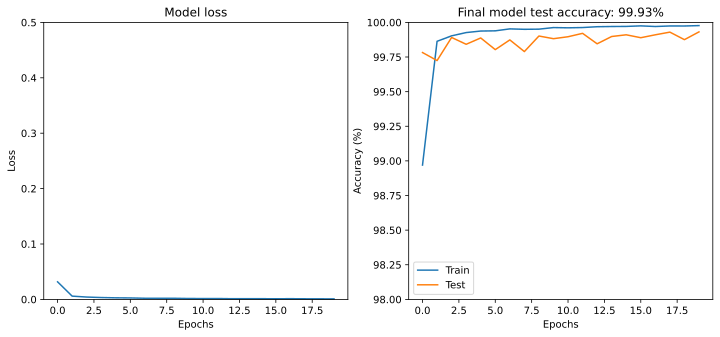

In [57]:
# Let's see the training loss and change in training and test accuracy
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,0.5])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([98,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

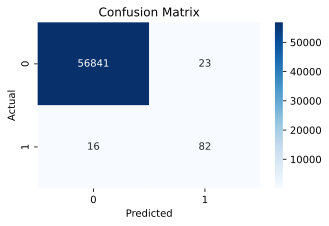

In [54]:
#confusion matrix for the FNN model
plt.figure(1, figsize=(5, 3))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(f'Confusion_Matrix_FNN.png', bbox_inches='tight')
plt.show()

### Conclusion
The FNN model shows strong performance in identifying credit card fraud, with notable improvements in recall and precision for fraudulent transactions (class 1) throughout the training process. By the final epoch, the precision for fraudulent transactions stands at 0.7810, and recall is at 0.8367. This indicates a solid ability to detect fraud, but there is room for enhancement. Future work could focus on further improving these metrics through techniques like hyperparameter tuning, class balancing, and advanced data augmentation strategies.

In [55]:
# Saving the model
torch.save(net, 'model_fnn.pth')

## Picking and saving the best model
Given the high cost of misclassifying a fraudulent transaction as a normal transaction, our primary goal is to minimize False Negatives and thereby enhance recall performance. While we aim to balance recall with precision, our emphasis remains on achieving higher recall.

Upon evaluating various performance metrics, we found that both Random Forest and XGBoost perform well. Although Random Forest delivers a superior F1 Score, XGBoost gives better recall with a slight trade-off in precision. This trade-off is acceptable given our priority to reduce False Negatives. Based on these findings, XGBoost is choosen as the most suitable model.

In [65]:
import joblib 

# Save the best model to a file
joblib.dump(best_model, 'xgb_model.pkl')
print("Model saved to 'xgb_model.pkl'")

Model saved to 'xgb_model.pkl'
